In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf

In [2]:
prototxtPath = os.path.sep.join(["./face_detector", "deploy.prototxt"])
weightsPath = os.path.sep.join(["./face_detector",
"res10_300x300_ssd_iter_140000.caffemodel"])
net = cv2.dnn.readNet(prototxtPath, weightsPath)

In [21]:
image_path = "./masks.jpg"

In [22]:
image = cv2.imread(image_path)
orig = image.copy()
(h, w) = image.shape[:2]

# construct a blob from the image
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),
    (104.0, 177.0, 123.0))

# pass the blob through the network and obtain the face detections
net.setInput(blob)
detections = net.forward()

# loop over the detections
for i in range(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with
    # the detection
    confidence = detections[0, 0, i, 2]

    # filter out weak detections by ensuring the confidence is
    # greater than the minimum confidence
    if confidence > 0.5:
        # compute the (x, y)-coordinates of the bounding box for
        # the object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # ensure the bounding boxes fall within the dimensions of
        # the frame
        (startX, startY) = (max(0, startX), max(0, startY))
        (endX, endY) = (min(w - 1, endX), min(h - 1, endY))

        # crop face and convert it from BGR to RGB
        # resize it to 64x64, and normalize it
        x_face = []
        face = image[startY:endY, startX:endX]
        face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
        face = cv2.resize(face, (64, 64))
        face = face/255
        x_face.append(face)
        x_face = np.array(x_face)
        print(x_face.shape)

        # pass the face through the model to determine if the face
        # has a mask or not
        #model = tf.keras.models.load_model('./model.h5')
        #predicted_y = model.predict(x_face)
        #predicted_y = np.argmax(predicted_y)
        #category_colors = {0: (0, 255, 0), 1: (0, 0, 255), 2: (255, 0, 0)}

        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255,0), 2)

[INFO] computing face detections...
(1, 64, 64, 3)
(1, 64, 64, 3)
(1, 64, 64, 3)


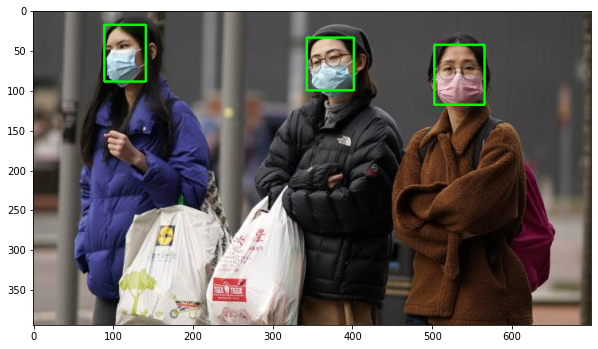

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))